In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import f_oneway,f as F
from scipy.stats import kruskal
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('datos/Datos Antropométricos.xlsx')

In [4]:
varc = [v for v in df.columns if v!='Sexo (H,M)']
contraste = 'Sexo (H,M)'

array([[<AxesSubplot:title={'center':'Estatura (cm)'}>,
        <AxesSubplot:title={'center':'Peso (kg)'}>],
       [<AxesSubplot:title={'center':'Talla Zapato (27,28,etc)'}>,
        <AxesSubplot:title={'center':'Edad'}>]], dtype=object)

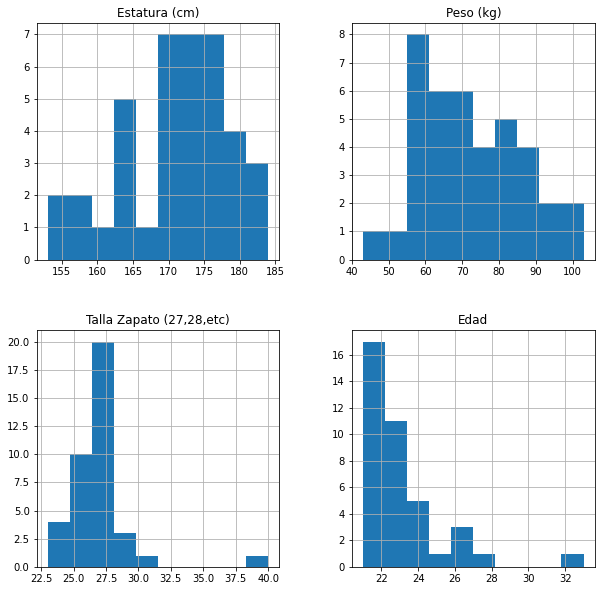

In [24]:
df[varc].hist(figsize=(10,10))

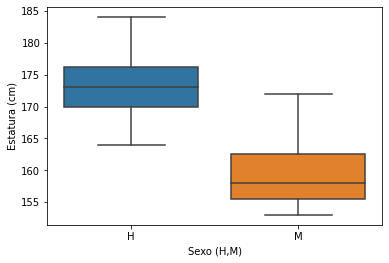

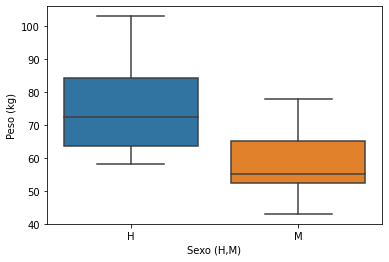

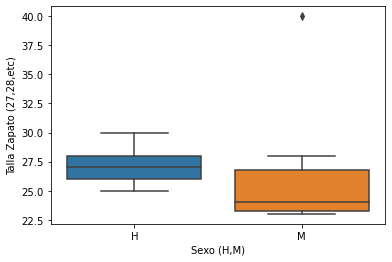

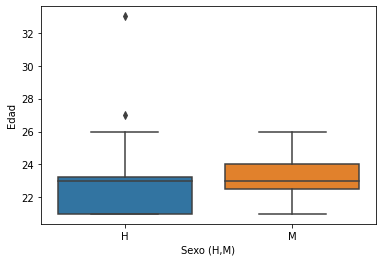

In [25]:
for v in varc:
    plt.figure()
    sns.boxplot(x=contraste,y=v,data=df)

In [26]:
for v in varc:
    print(v)
    print(f_oneway(*[d[v] for _,d in df[[contraste,v]].groupby(contraste)]))
    print()

Estatura (cm)
F_onewayResult(statistic=33.816126876585905, pvalue=1.1174567180063684e-06)

Peso (kg)
F_onewayResult(statistic=9.933299770851827, pvalue=0.0032115388231020578)

Talla Zapato (27,28,etc)
F_onewayResult(statistic=0.11628615114915906, pvalue=0.7350267981609112)

Edad
F_onewayResult(statistic=0.0693590291709146, pvalue=0.7937334867234698)



In [9]:
df[[contraste,v]].groupby(contraste)

AttributeError: 'DataFrameGroupBy' object has no attribute 'd'

In [11]:
v=varc[0]
[d[v] for _,d in df[[contraste,v]].groupby(contraste)]

[0     180
 1     172
 2     170
 7     164
 8     173
 9     170
 10    170
 11    180
 12    173
 13    169
 14    174
 17    170
 18    172
 19    175
 20    184
 21    175
 22    168
 23    165
 24    175
 25    181
 26    165
 28    165
 29    176
 30    170
 31    179
 32    173
 33    175
 34    178
 35    176
 36    177
 37    170
 38    184
 Name: Estatura (cm), dtype: int64,
 3     160
 4     165
 5     154
 6     153
 15    172
 16    157
 27    158
 Name: Estatura (cm), dtype: int64]

In [27]:
for v in varc:
    print(v)
    print(kruskal(*[d[v] for _,d in df[[contraste,v]].groupby(contraste)]))
    print()

Estatura (cm)
KruskalResult(statistic=12.55563708186557, pvalue=0.00039501290733223276)

Peso (kg)
KruskalResult(statistic=7.36149693037837, pvalue=0.006663529277065723)

Talla Zapato (27,28,etc)
KruskalResult(statistic=3.7923566340854737, pvalue=0.0514871095212523)

Edad
KruskalResult(statistic=0.7761498558531313, pvalue=0.3783212432713209)



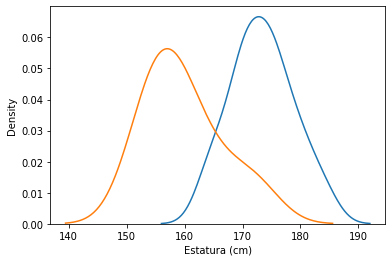

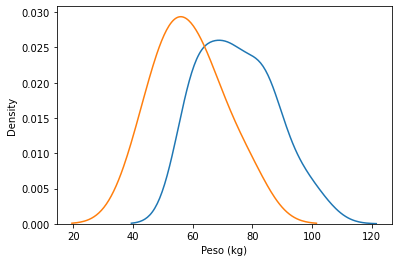

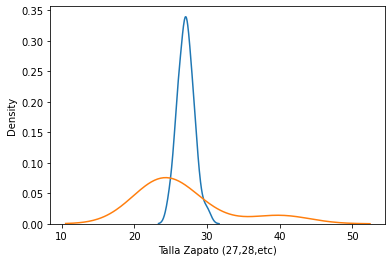

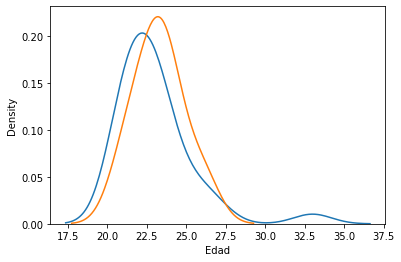

In [28]:
for v in varc:
    plt.figure()
    for _,d in df[[contraste,v]].groupby(contraste):
        sns.distplot(d[v],hist=False)

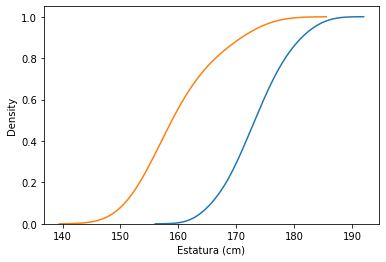

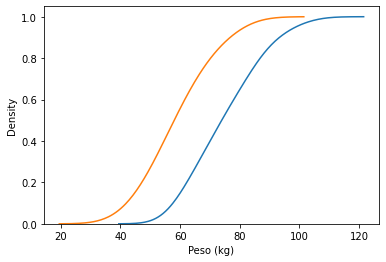

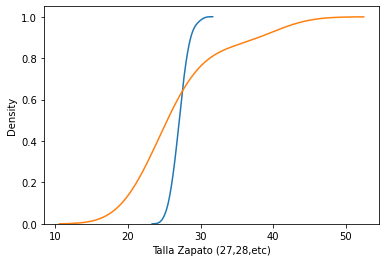

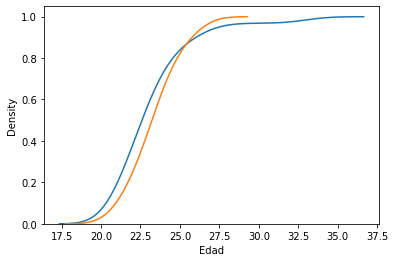

In [29]:
for v in varc:
    plt.figure()
    for _,d in df[[contraste,v]].groupby(contraste):
        sns.distplot(d[v],hist=False,kde_kws={'cumulative':True})